In [24]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
data_dir = './data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')

print(train_data_path)
print(sub_data_path)

./data/train.csv
./data/test.csv


In [34]:
train_data = pd.read_csv(train_data_path)
sub_data = pd.read_csv(sub_data_path)

print(f'train data : {train_data.shape}')
print(f'test data : {sub_data.shape}')

train data : (15035, 21)
test data : (6468, 20)


In [35]:
y = train_data['price']
train_data.drop(columns =['price'], inplace=True)

print(train_data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [36]:
def data_preprocessing(data):
    
    del data['id'] # id 컬럼 삭제 
    data['date'] = data['date'].apply(lambda x:x[:6]).astype(int) # date 컬럼의 값을 변경 
    
    return data

train_data = data_preprocessing(train_data)
sub_data = data_preprocessing(sub_data)

In [37]:
train_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [38]:
sub_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<AxesSubplot:>

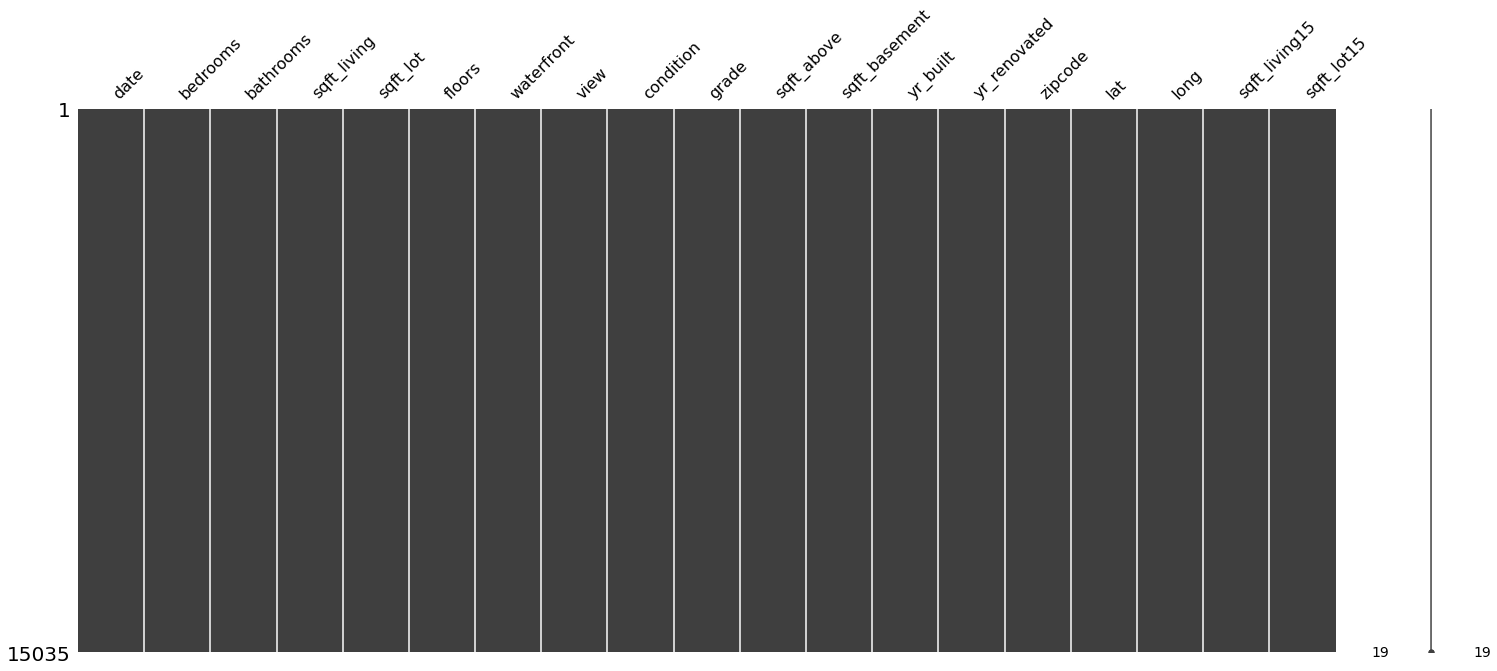

In [39]:
msno.matrix(train_data)

<AxesSubplot:>

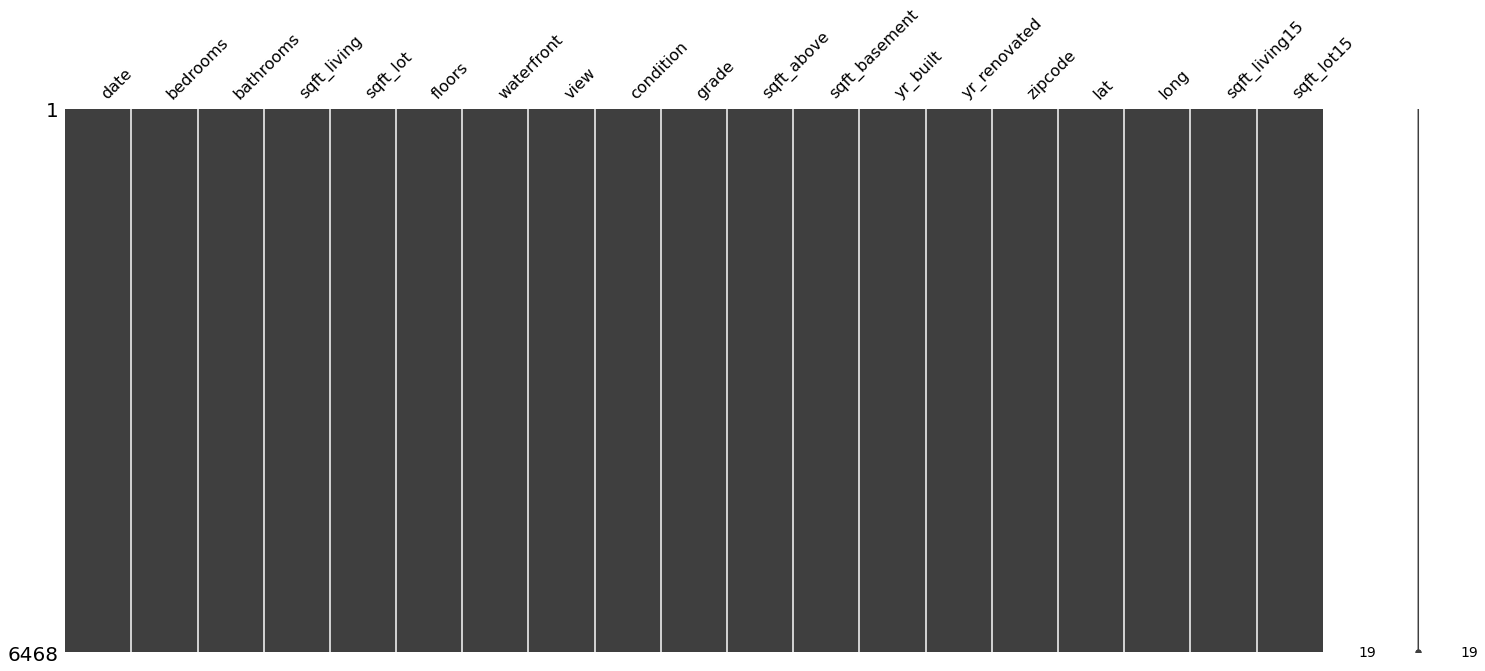

In [40]:
msno.matrix(sub_data)

train data와 test data 모두 결측치가 없다는 것을 알 수 있습니다. 

In [41]:
train_data.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,201438.545993,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,44.252050,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,201405.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,201407.000000,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,201410.000000,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,201502.000000,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,201505.000000,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


각 컬럼의 데이터를 확인해보면 값이 범위가 차이가 많이 나는 것을 알 수 있어 정규화를 할 필요가 있을 것이라고 판단됩니다. 

In [42]:
scaler = StandardScaler()

In [43]:
std_train_data = scaler.fit_transform(train_data)
std_train_data = pd.DataFrame(std_train_data, columns=train_data.columns)
std_train_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.645099,-0.408931,-1.452865,-0.980140,-0.226394,-0.924917,-0.084662,-0.306875,-0.62902,-0.560048,-0.738427,-0.657286,-0.547510,-0.209296,1.875717,-0.358430,-0.306626,-0.944060,-0.258655
1,1.433970,-1.516730,-1.452865,-1.424775,-0.124309,-0.924917,-0.084662,-0.306875,-0.62902,-1.407676,-1.231387,-0.657286,-1.295641,-0.209296,-0.938751,1.282425,-0.136763,1.051794,-0.171690
2,1.433970,-0.408931,-0.149923,-0.437901,-0.169367,-0.924917,-0.084662,-0.306875,-0.62902,0.287579,-0.137257,-0.657286,0.540680,-0.209296,-0.075648,0.405903,1.193836,-0.278776,-0.191845
3,-0.735493,-0.408931,0.175813,-0.399945,-0.198960,0.932080,-0.084662,-0.306875,-0.62902,-0.560048,-0.095175,-0.657286,0.812727,-0.209296,-1.407829,-1.816888,-0.802062,0.354691,-0.216507
4,1.411372,-0.408931,-0.801394,-1.110277,-0.131091,-0.924917,-0.084662,-0.306875,-0.62902,-0.560048,-0.882708,-0.657286,-0.275463,-0.209296,2.250979,-1.094536,-0.717130,-0.495716,-0.112235


In [44]:
std_train_data.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04,1.503500e+04
mean,5.091176e-14,3.948214e-16,-3.096913e-15,1.801759e-17,-1.233688e-16,-1.108096e-15,2.752378e-15,4.499117e-15,-7.113801e-15,8.517120e-15,-2.773896e-16,-2.166290e-15,3.703737e-15,-4.919119e-15,-9.088233e-15,2.052934e-15,5.229477e-14,5.363924e-17,1.350211e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-7.580916e-01,-3.732329e+00,-2.755808e+00,-1.945324e+00,-3.467843e-01,-9.249168e-01,-8.466250e-02,-3.068752e-01,-3.722682e+00,-5.645812e+00,-1.808511e+00,-6.572857e-01,-2.417836e+00,-2.092958e-01,-1.445355e+00,-2.930094e+00,-2.160971e+00,-2.305001e+00,-4.388944e-01
25%,-7.128945e-01,-4.089315e-01,-4.756585e-01,-7.090205e-01,-2.410028e-01,-9.249168e-01,-8.466250e-02,-3.068752e-01,-6.290205e-01,-5.600485e-01,-7.264040e-01,-6.572857e-01,-6.835339e-01,-2.092958e-01,-8.449357e-01,-6.370937e-01,-8.091398e-01,-7.271195e-01,-2.784853e-01
50%,-6.450988e-01,-4.089315e-01,1.758127e-01,-1.884715e-01,-1.801622e-01,3.581837e-03,-8.466250e-02,-3.068752e-01,-6.290205e-01,-5.600485e-01,-2.695145e-01,-6.572857e-01,1.326084e-01,-2.092958e-01,-2.445158e-01,8.091642e-02,-1.226074e-01,-2.064621e-01,-1.879871e-01
75%,1.433970e+00,6.988676e-01,5.015484e-01,5.164386e-01,-1.079867e-01,9.320805e-01,-8.466250e-02,-3.068752e-01,9.178102e-01,2.875787e-01,5.240304e-01,5.908743e-01,8.807389e-01,-2.092958e-01,7.311664e-01,8.510401e-01,6.205461e-01,5.311360e-01,-9.907523e-02
max,1.501766e+00,7.345662e+00,7.667732e+00,1.242400e+01,3.839493e+01,3.717576e+00,1.181161e+01,4.933180e+00,2.464641e+00,4.525715e+00,9.156837e+00,8.715261e+00,1.492846e+00,4.823358e+00,2.269742e+00,1.569774e+00,6.360522e+00,6.099279e+00,3.094883e+01


In [45]:
std_sub_data = scaler.transform(sub_data)
std_sub_data = pd.DataFrame(std_sub_data, columns=sub_data.columns)
std_sub_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.599902,-0.408931,0.175813,0.527283,-0.189033,0.932080,-0.084662,-0.306875,-0.629020,-0.560048,0.451890,0.250467,-0.683534,4.763416,0.881271,1.160103,-0.745441,-0.437865,-0.186941
1,-0.599902,0.698868,1.153020,-0.134248,-0.241648,-0.924917,-0.084662,-0.306875,2.464641,-0.560048,-0.894732,1.407852,-0.207451,-0.209296,1.087666,-0.288946,-1.269187,-0.915135,-0.282091
2,-0.758092,0.698868,3.107433,3.618043,2.033095,-0.924917,-0.084662,-0.306875,-0.629020,2.830460,2.519916,2.814868,1.016763,-0.209296,-0.469673,0.690356,1.476942,4.002186,3.212729
3,1.479167,-0.408931,-1.452865,-0.329454,-0.183682,-0.924917,-0.084662,-0.306875,-0.629020,-0.560048,-0.894732,0.999363,-0.377481,-0.209296,1.275297,-0.350469,-0.872839,-0.307701,-0.169851
4,1.456569,-0.408931,0.501548,-0.210161,-0.205038,0.932080,-0.084662,-0.306875,-0.629020,-0.560048,0.115235,-0.657286,1.084775,-0.209296,-0.751120,-1.392018,1.292923,0.574524,-0.189429


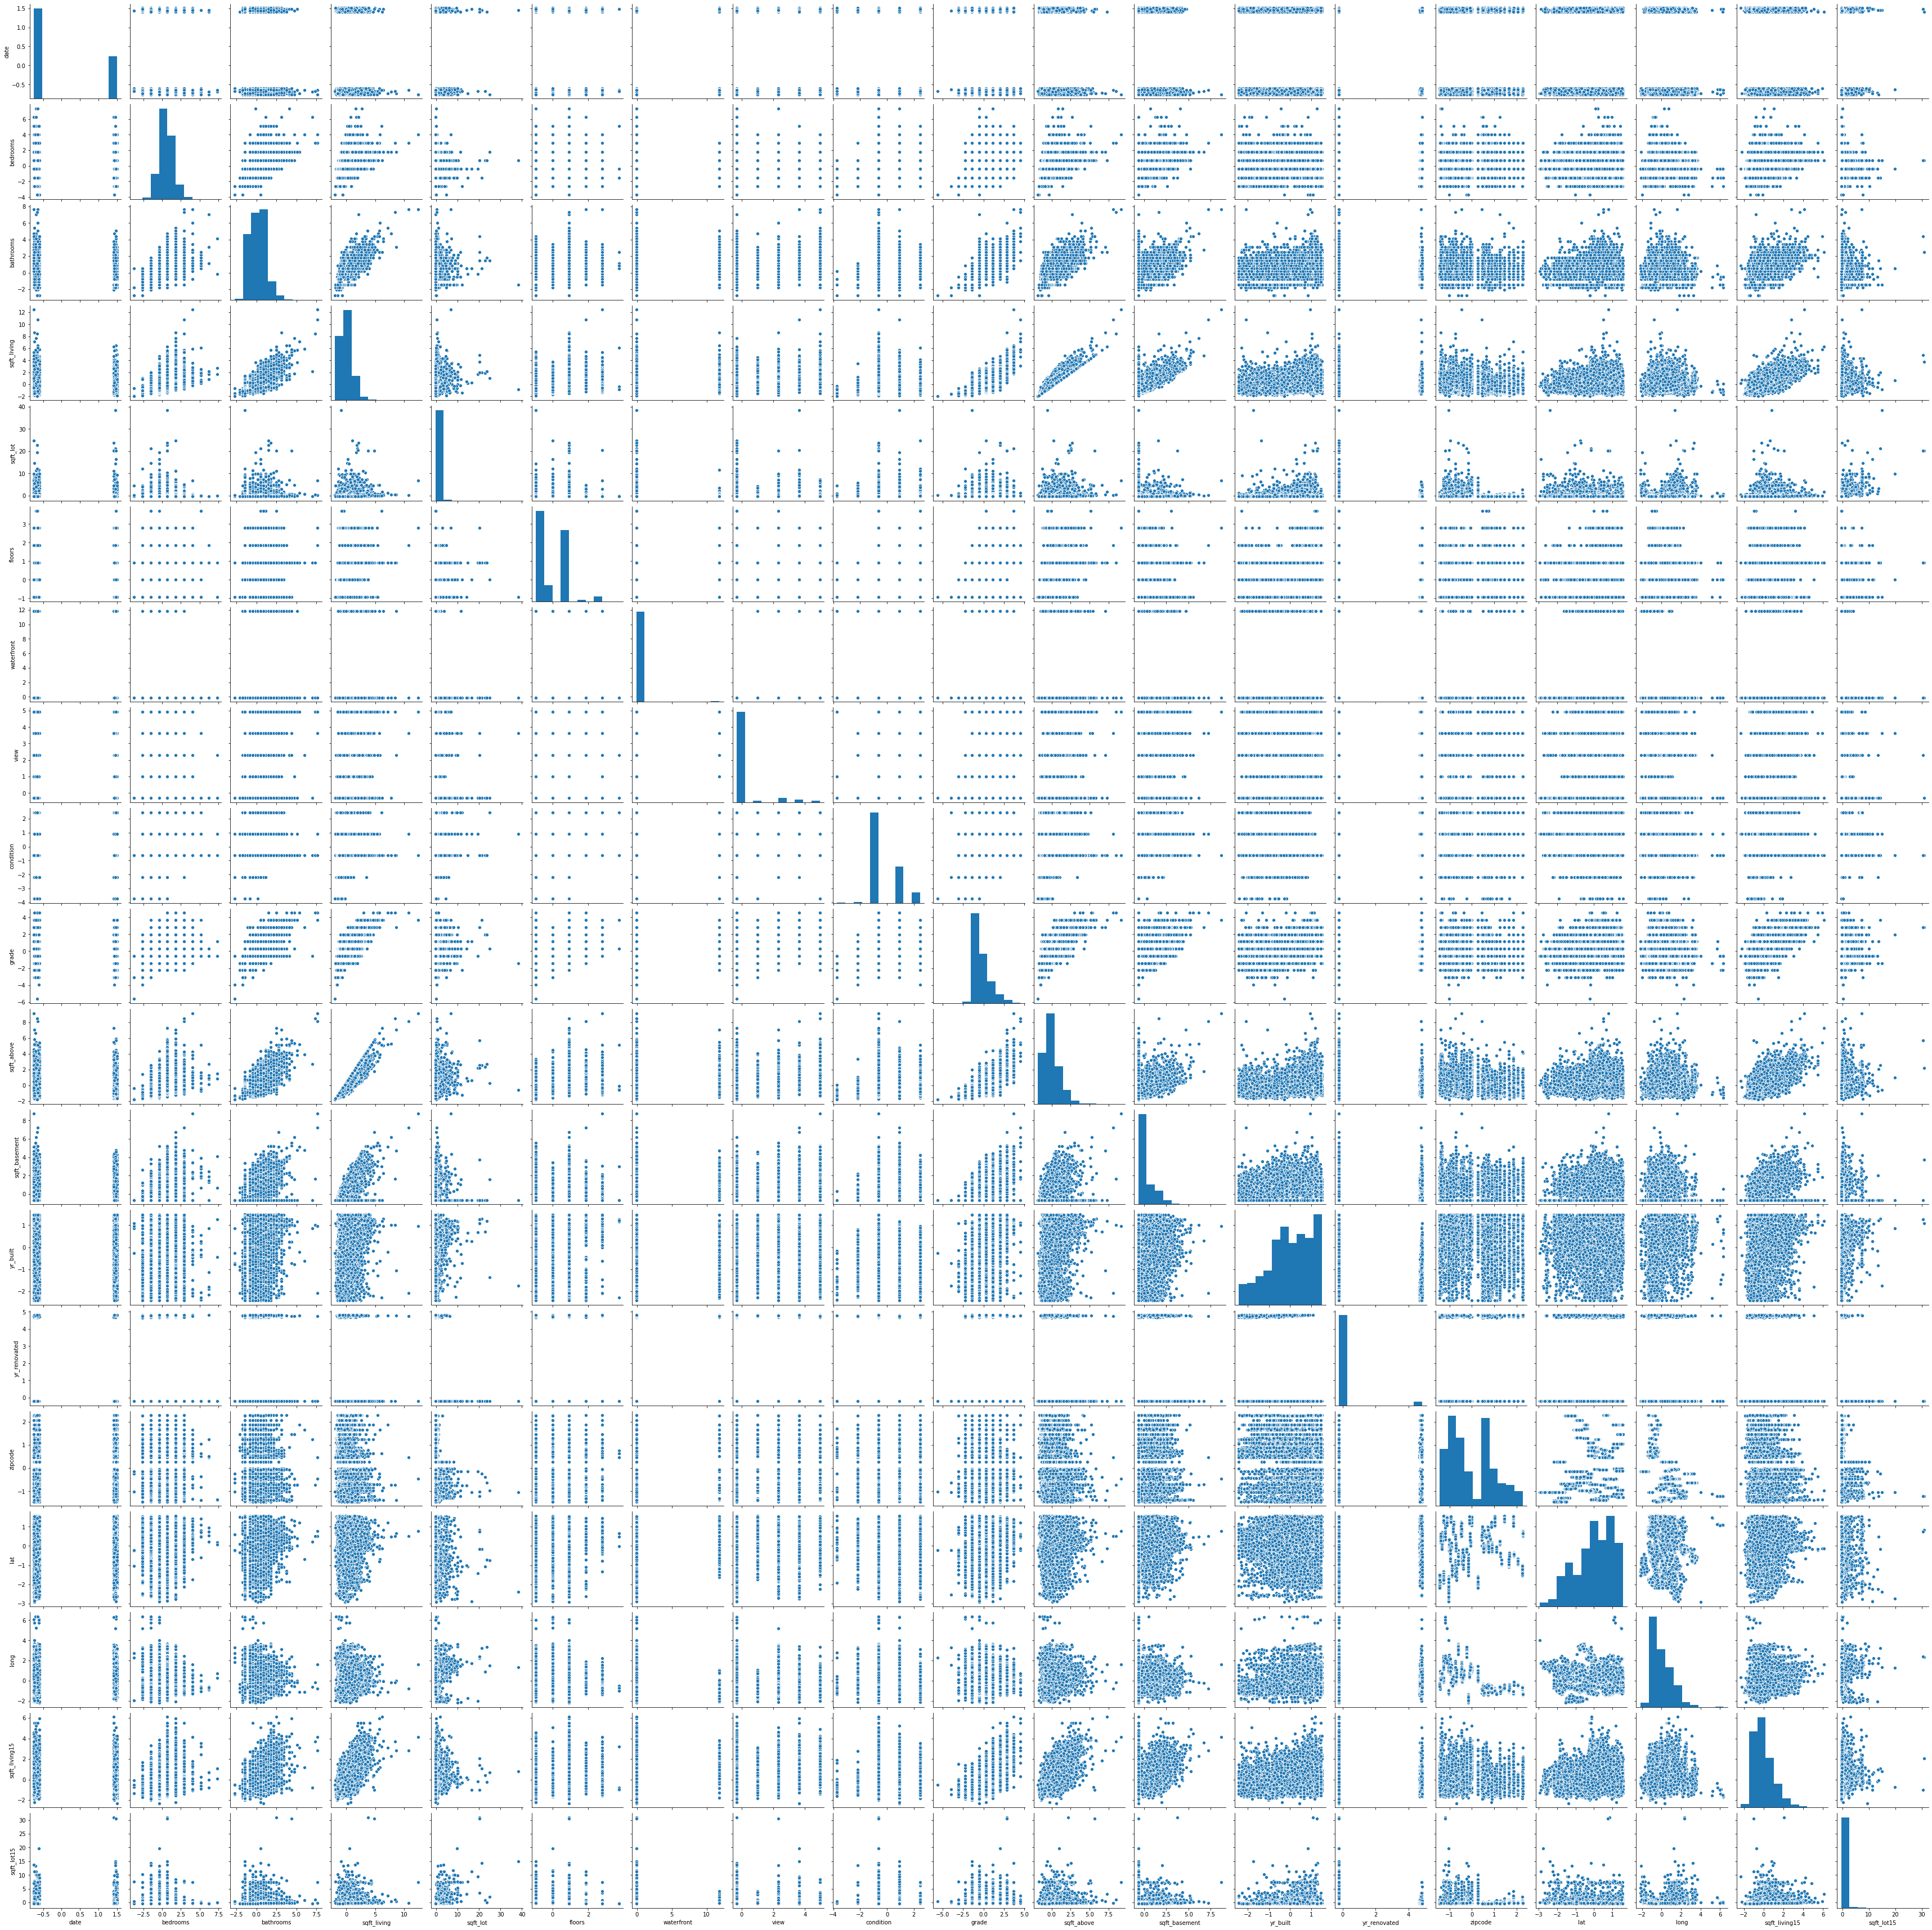

In [52]:
sns.pairplot(std_train_data)
plt.show()